# Speed Dating Social Experimet Data Analysis
**Data**: https://www.kaggle.com/annavictoria/speed-dating-experiment  
**Experiment**:  Subjects are ivited to participate in a sessions (waves) of experimental speed dating events. If they accept to participate, a 3 phase procedure is launched. 
>> **Registration Phase**: subjects are asked to supply data related to demographics, dating habits, lifestyle information, and attributes evaluation questionnaire  
**Event Phase**: dates are predefined between different genders. After each date (4 mn date) during the event, the subject is asked to fill in a score card where they are asked to evaluate their partners given 6 attributes. Finally, subjects should decide whether they would like a seco,d date with their partners or not.  
**Post Event Phase**: Subjects are asked to fill in another questionnaire in order to receive their matches

**Main Question**: what it takes to improve the chance to get an approval from the partners

📝 **Note**  
Some of the parts which follow in this analysis have been inspired by the analysis done by James Hwang, Lucas Cadalzo and coded in **R language**:     
    https://www.kaggle.com/jph84562/the-ugly-truth-of-people-decisions-in-speed-dating/script

In [1]:
# Importing useful libraries
# generic libs
import pandas as pd
import numpy as np
from math import pi

#plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as tick

# view all possible rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Predefined Functions
from modules import MyFunctions as F

# Exploring Data

## Load Data

In [2]:
# load Data
dataset = pd.read_csv("data/Speed_Dating_Data.csv", encoding= 'unicode_escape')

## Genreic information

In [3]:
F.explore(dataset)

Shape : (8378, 195)

data types : 
iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
caree

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9


Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Distinct values: 


iid         551
id           23
gender        2
idg          44
condtn        2
wave         21
round        15
position     22
positin1     23
order        22
partner      22
pid         552
match         2
int_corr    156
samerace      2
age_o        25
race_o        6
pf_o_att     95
pf_o_sin     79
pf_o_int     66
pf_o_fun     72
pf_o_amb     83
pf_o_sha     86
dec_o         2
attr_o       19
sinc_o       15
intel_o      18
fun_o        18
amb_o        16
shar_o       16
like_o       19
prob_o       20
met_o         8
age          25
field       260
field_cd     19
undergra    242
mn_sat       69
tuition     116
race          6
imprace      12
imprelig     11
from        270
zipcode     410
income      262
goal          7
date          8
go_out        8
career      368
career_c     18
sports       11
tvsports     11
exercise     11
dining       11
museums      12
art          12
hiking       12
gaming       13
clubbing     12
reading      12
tv           11
theater      12
movies  

## Missing values

In [4]:
F.missing(dataset)

,Variable,n_missing,p_missing
160,num_in_3,7710,92.03
159,numdat_3,6882,82.14
68,expnum,6578,78.52
123,sinc7_2,6423,76.67
126,amb7_2,6423,76.67
127,shar7_2,6404,76.44
122,attr7_2,6394,76.32
124,intel7_2,6394,76.32
125,fun7_2,6394,76.32
194,amb5_3,6362,75.94


# Data Structuring and cleaning

In [5]:
# Remove the variables that will not be included in the analysis (redundant vars and undergraduate related vars)
#id, idg, condtn, round, position, position1, order, partner, tuition, undergra, mn_sat

col_to_rem = ['id', 'idg', 'condtn', 'round', 'position', 'positin1', 'order', 'partner', 'tuition', 'undergra', 'mn_sat']
dataset.drop(col_to_rem, inplace = True, axis = 1)

print(dataset.shape)

(8378, 184)


In [6]:
# add a new column 'gender_str' in order to be used as categorical variable in the analysis
dataset["gender_str"] = np.where(dataset["gender"]==1,"Male","Female")
dataset["gender_str"] = dataset["gender_str"].astype(str)

dataset["gender_str"].value_counts()

Male      4194
Female    4184
Name: gender_str, dtype: int64

# Data Analysis

In [7]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

## Age/Gender Analysis

### Age Analysis (in which category participants' age fall into)

In [8]:
# check if there are missing values
dataset.isna().sum()['age']

95

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of Subjects'),
 Text(0.5, 1.0, 'Age Distribution')]

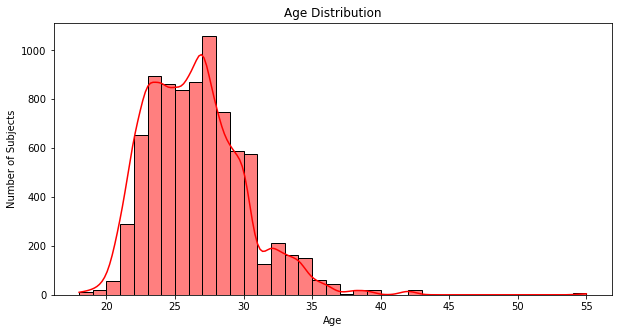

In [9]:
#Age Distribution using Seaborn
plt.figure(figsize=(10, 5))
sns.set_palette('bright')
ax = sns.histplot(dataset['age'], kde=True, binwidth=1, color='r')
ax.set(xlabel="Age", ylabel="Number of Subjects", title="Age Distribution")

🗒 **OBSERVATION**  
•	  The distribution is right skewed because of the very few subjects aged more than 35 years  
•	  The most convinient imputation technique for this case is the median imputation. 

In [10]:
# most common age of participants
dataset["age"].value_counts()

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: age, dtype: int64

In [11]:
# assign all NaN values in the age column to the average age
dataset["age"] = dataset["age"].fillna(round(dataset["age"].median(),1))
dataset["age"] = dataset["age"].astype(int)

In [12]:
dataset.isna().sum()['age']

0

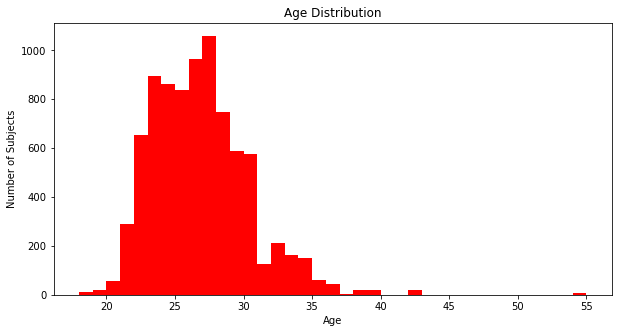

In [13]:
#Age Distribution using Matplotlib
plt.figure(figsize=(10, 5))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Subjects")
bins = bins = np.arange(dataset.age.min(),dataset.age.max()+1, 1)
histo = plt.hist(data=dataset, x="age", bins = bins, facecolor = 'r')
plt.show()

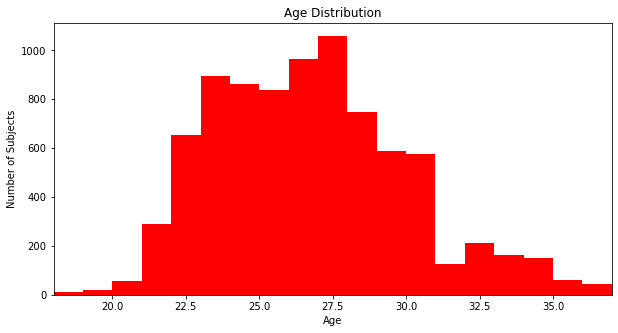

In [14]:
# zooming on age of majority of participants
bins = np.arange(dataset.age.min(),dataset.age.max()+0.5, 1)
plt.figure(figsize=(10, 5))
plt.hist(data=dataset, x="age", bins = bins, color = 'r')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.xlim(18, 37)
plt.ylabel("Number of Subjects")
plt.show()

In [15]:
pd.qcut(dataset['age'], q=4)
cut_labels = ['18-21', '22-31', '32-55']
cut_bins = [18, 22, 32, 55]
dataset['cut_age'] = pd.cut(dataset['age'], bins=cut_bins, labels=cut_labels)
N = dataset['age'].count()
round((dataset['cut_age'].value_counts()/N)*100, 1)

22-31    81.9
18-21    12.2
32-55     5.8
Name: cut_age, dtype: float64

🗒 **OBSERVATION**  
•	Most participants were aged 22-31 years (81.9%)  
•	Older adults are barely interested in speed dating (only 5.8%)  

In [16]:
dataset['age'].describe()

count    8378.000000
mean       26.354858
std         3.546684
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

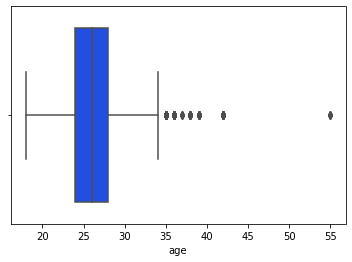

In [17]:
sns.boxplot(dataset['age'])

🗒 **OBSERVATION**   
•	the box plot confirms the results of the histogram.  
•	There is no great variability of age among participants  
•	Several outliers are observed beyond 35 years old, which confirms the fact that older adults are not really interested in speed dating

### Gender Analysis (which gender is more interested in Speed Dating)

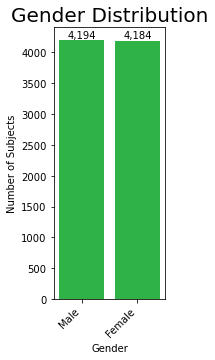

In [18]:
# barchart of gender analysis
plt.figure(figsize=(2,5))
bar_color = sns.color_palette()[2]

chart = sns.countplot(data = dataset, x='gender_str',color = bar_color, order = dataset['gender_str'].value_counts().index)
plt.title("Gender Distribution", fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Number of Subjects")

#as the labels on the axis x are string of important lenght, we should rotate the texts to have clear illustrations
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# add Number of subjects to each bar
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

🗒 **OBSERVATION**  
Both genders are equally interested in Speed Dating.

### Age & Gender Analysis

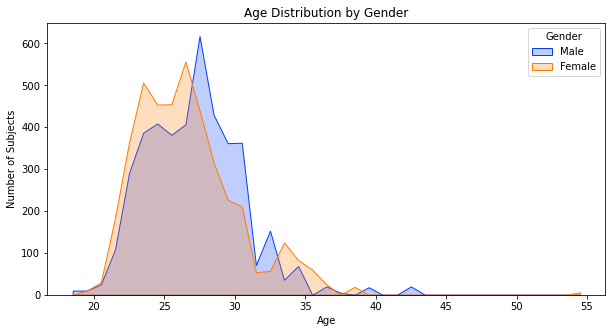

In [19]:
#Age Distribution by gender
plt.figure(figsize=(10, 5))
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
#plt.xlim(32, 38)
plt.ylabel("Number of Subjects")
colors = [sns.color_palette()[1], sns.color_palette()[0]]

sns.histplot(data=dataset, x='age', hue='gender_str', binwidth=1, kde=False, element='poly', palette=colors)
legend = plt.legend(['Male', 'Female'])
legend.set_title('Gender')

🗒 **OBSERVATION**  
In young adulthood, a higher proportion of female participants were aged 20-27 than males. This pattern was repeated for middle age females (34–37 years). However, a higher proportion of male participants were aged (28-33 years) compared to females.

## Goal Analysis  (What is the primary goal of subjects in participating in Speed Dating)

In [20]:
#checking for missing values
# we will not remove missing data for this variable, we will just consider it as no data
dataset.isna().sum()['goal']

79

In [21]:
# unique values of goal variable
np.sort(dataset['goal'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6., nan])

In [22]:
dataset['goal'].value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: goal, dtype: int64

In [23]:
# change the goal variables to include string instead of integers while keeping missing data as no data
dataset['goal'] = dataset.goal.apply(lambda x: 
                                     "fun night out" if x == 1
                                     else "meet new people" if x == 2
                                     else "get a date" if x == 3
                                     else "looking for serious relationship" if x == 4
                                     else "to say I dit it" if x == 5
                                     else "other goal" if x == 6
                                     else "no data")

In [24]:
dataset['goal'].unique()

array(['meet new people', 'fun night out', 'other goal', 'get a date',
       'looking for serious relationship', 'no data', 'to say I dit it'],
      dtype=object)

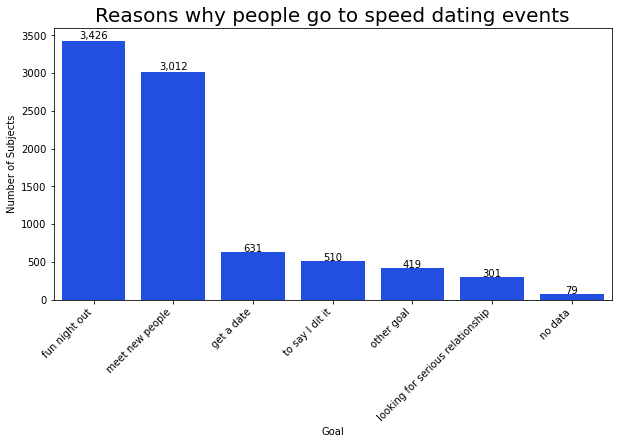

In [25]:
# barchart of reasons for participating in speed dating events
plt.figure(figsize=(10,5))
bar_color = sns.color_palette()[0]

chart = sns.countplot(data = dataset, x='goal',color = bar_color, order = dataset['goal'].value_counts().index)
plt.title("Reasons why people go to speed dating events", fontsize=20)
plt.xlabel("Goal")
plt.ylabel("Number of Subjects")

#as the labels on the axis x are string of important lenght, we should rotate the texts to have clear illustrations
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# add Number of subjects to each bar
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

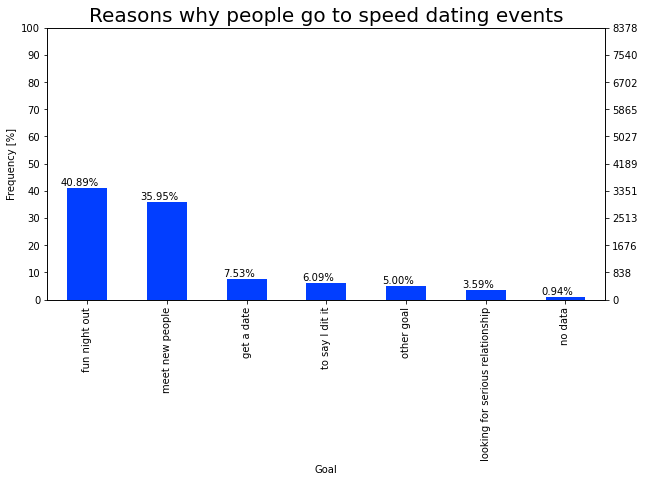

In [26]:
plt.figure(figsize=(10,5))
plt.title("Reasons why people go to speed dating events", fontsize=20)
plt.xlabel('Goal')
plt.ylabel('Frequency [%]')

# show the frequencies
ax = (dataset.goal.value_counts()/len(dataset)*100).plot(kind="bar")
# y axis on the left for the frequency [%]
ax.set_yticks(np.arange(0, 110, 10))

#as the labels on the axis x are string of important lenght, we should rotate the texts to have clear illustrations
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# y axis on the right for the number of subjects
ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(dataset)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1), ha="center")

    
# pie chart

🗒 **OBSERVATION**    
Most people go to speed dating events to have fun night out (40,89%) or meet new people (35,95%).  
Getting a date is actually the primary goal for only 7,53 % of participants.

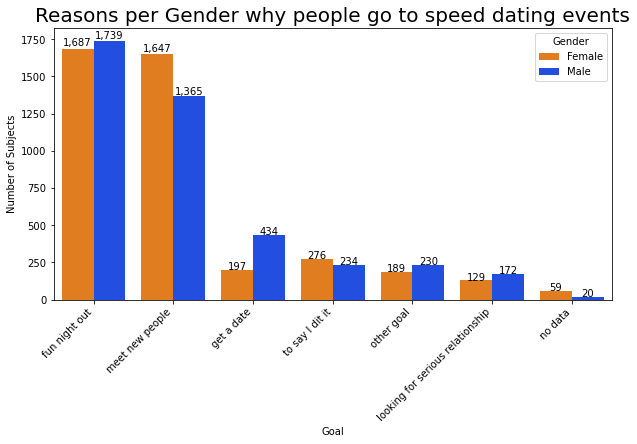

In [27]:
# barchart of reasons for participating in speed dating events
plt.figure(figsize=(10,5))
bar_colors = [sns.color_palette()[1], sns.color_palette()[0]]

chart = sns.countplot(data = dataset, x='goal', hue='gender_str', palette = bar_colors, order = dataset['goal'].value_counts().index)
plt.title("Reasons per Gender why people go to speed dating events", fontsize=20)
plt.xlabel("Goal")
plt.ylabel("Number of Subjects")

#as the labels on the axis x are string of important lenght, we should rotate the texts to have clear illustrations
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# add Number of subjects to each bar
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height * 1.01,
            "{:,.0f}".format(height),
            ha="center");

legend = plt.legend(['Female', 'Male'])
legend.set_title('Gender')

🗒 **OBSERVATION**    
Females are more interested in meeting new people but less interested in getting a date.

## Attributes that participants look for in their partners

In [28]:
# extract attributes related data and change the columns lables, all with the subject identifer and his gender
attributes = dataset[['iid','gender_str','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
attributes.columns = ['id', 'gender','attractive', 'sincere','intelligent','fun','ambitious','shared_interests'] 

In [29]:
# check for duplicates, especially in the 'id' column
F.duplicates_count(dataset)

No duplicated rows found


In [30]:
# add a new column to sum up the rates of the different attributes
attributes['sum']= attributes.iloc[:,2:].sum(axis=1)
attributes['sum'].value_counts().sort_index()

0.00        79
90.00       65
95.00       22
99.98       26
99.99       16
99.99       82
99.99      199
100.00      56
100.00    7142
100.00     110
100.01     127
100.01     239
100.02      56
100.02      92
101.00      10
110.00      22
120.00      25
148.00      10
Name: sum, dtype: int64

📝 **Note**  
•	the sum 0 means that all entries are missing so we drop those observations  
•	the data is not normalised as different scales are used as mentioned in the data description, hence we should normalize the data in order to get significative results

In [31]:
# drop rows where all attributes were not rated 
index = attributes[attributes['sum']==0].index
attributes.drop(index=index, inplace=True, errors='raise')

In [32]:
## Normalize
##all values will be redistributed and curved to fit 100 total points using the rule x_norm = x /sum * 100
for col in attributes.columns[2:]:
    attributes[col] = round((attributes[col] / attributes['sum'])*100,2)

In [33]:
#del attributes['sum']
attributes

,id,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,sum
0,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
1,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
2,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
3,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
4,1,Female,15.0,20.0,20.0,15.0,15.0,15.0,100.0
...,...,...,...,...,...,...,...,...,...
8373,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8374,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8375,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0
8376,552,Male,70.0,0.0,15.0,15.0,0.0,0.0,100.0


In [34]:
attributes.iloc[:,2:8].mean().sort_values(ascending=False)

attractive          22.509522
intelligent         20.263096
fun                 17.451919
sincere             17.387194
shared_interests    11.835349
ambitious           10.659928
dtype: float64

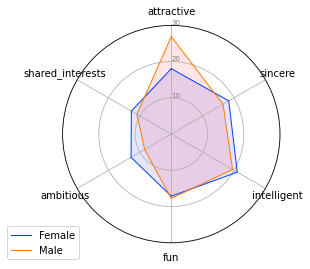

In [35]:
# Radar Chart or spider plot

# 1) data
radar_data = attributes.groupby('gender').mean().iloc[:,1:7]

# 2) Number of variables
categories = list(radar_data.columns)
N = len(categories)

# 3) the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,30)

# add plots
# Female
values=radar_data.loc['Female'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values, 'b', alpha=0.1)

# Male
values=radar_data.loc['Male'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

🗒 **OBSERVATION**    
There is an obvious difference between what male and female participants are looking for in their partners  
•	For male participants, attractiveness is given a lot more weight, and the ambitiousness or if they have any shared interset are ranked not as high.  
•	For females, the points are more evenly distributed across all of the attributes, with intelligence ranked slightly higher compared to others.  
•	There is no particular difference between male and female participants for some attributes like fun and intelligence

## Which of the 6 Attributes Actually Influence Decision Making

In [36]:
dataset.isna().sum()['pid']

10

In [37]:
mask = pd.isna(dataset['pid'])==False
data_event = dataset.loc[mask][['iid','pid', 'dec', 'gender_str','attr', 'sinc','intel','fun','amb','shar', 'like', 'prob']]
data_event.columns = ['id', 'partner_id', 'decision','gender','attractive', 'sincere','intelligent','fun','ambitious','shared_interests', 'like','probability']
data_event.head()

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0


In [38]:
# check for missing values
F.missing(data_event)

,Variable,n_missing,p_missing
9,shared_interests,1066,12.74
8,ambitious,712,8.51
7,fun,350,4.18
11,probability,308,3.68
6,intelligent,296,3.54
5,sincere,277,3.31
10,like,240,2.87
4,attractive,202,2.41


In [39]:
data_event['attractive'].unique()

array([ 6. ,  7. ,  5. ,  4. ,  8. ,  9. ,  3. , 10. ,  1. ,  nan,  2. ,
        0. ,  6.5,  7.5,  9.5,  8.5,  9.9,  3.5])

📝 **Note**    
the amount of missing data is important, so we cannot do a full na drop, but we will drop only the rows where all attributes are not rated (missing).   
To do that, we will replace, as a first step, all the na values for the 6 attributes by 1000   
Only rows that add up to 6*1000 will be dropped   
Second, we will convert back all rates equal to 1000 as na values   

In [40]:
# replace na values for the 6 attributes by 1000 : fillna / replace
# Attributes = [attractive, sincere, intelligent, fun, ambition, shared_interests]

data_event.iloc[:, 4:10]= data_event.iloc[:, 4:10].fillna(1000.0)

In [41]:
# add a new column to sum up the rates of the different attributes
data_event['sum']= data_event.iloc[:,4:10].sum(axis=1)
data_event['sum'].value_counts()[6000.0]

192

In [42]:
data_event['sum'].value_counts()[0.0]

3

In [43]:
# drop rows where all attributes were not rated  (sum == 6000) or sum =0.0 (remember scale in [1,10])
index = data_event[(data_event['sum'] == 6000.0) | (data_event['sum'] == 0.0)].index
data_event.drop(index=index, inplace=True, errors='raise')
data_event.shape

(8173, 13)

In [44]:
# convert back 1000 values to na
data_event.iloc[:, 4:10]= data_event.iloc[:, 4:10].replace(1000.0, np.nan)
data_event.head()

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability,sum
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,40.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,41.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,42.0
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,42.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,37.0


In [45]:
# recompute the sum while skipping nan values
data_event['sum']= data_event.iloc[:,4:10].sum(axis=1, skipna=True)
data_event

,id,partner_id,decision,gender,attractive,sincere,intelligent,fun,ambitious,shared_interests,like,probability,sum
0,1,11.0,1,Female,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,40.0
1,1,12.0,1,Female,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,41.0
2,1,13.0,1,Female,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,42.0
3,1,14.0,1,Female,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,42.0
4,1,15.0,1,Female,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,0,Male,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,18.0
8374,552,527.0,0,Male,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,26.0
8375,552,528.0,0,Male,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,35.0
8376,552,529.0,0,Male,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,24.0


In [46]:
data_event['sum'].value_counts().head()

36.0    404
40.0    400
41.0    398
42.0    389
38.0    373
Name: sum, dtype: int64

In [47]:
# add partner gender
data_event['partner_gender'] = np.where(data_event['gender'] == 'Female', 'Male', 'Female')

In [48]:
graph_data = data_event.groupby(['partner_id', 'partner_gender']).mean().iloc[:, 1:8]
graph_data.head()

,,decision,attractive,sincere,intelligent,fun,ambitious,shared_interests
partner_id,partner_gender,,,,,,,
1.0,Female,0.5,6.7,7.4,8.0,7.2,8.000000,7.1
2.0,Female,0.6,7.7,7.1,7.9,7.5,7.500000,6.5
3.0,Female,0.5,6.5,7.1,7.3,6.2,7.111111,6.0
4.0,Female,0.6,7.0,7.1,7.7,7.5,7.700000,7.2
5.0,Female,0.3,5.3,7.7,7.6,7.2,7.800000,6.2


In [49]:
graph_data_1 = graph_data[graph_data['attractive'].notnull()][['decision', 'attractive']]
graph_data_2 = graph_data[graph_data['sincere'].notnull()][['decision', 'sincere']]
graph_data_3 = graph_data[graph_data['intelligent'].notnull()][['decision', 'intelligent']]
graph_data_4 = graph_data[graph_data['fun'].notnull()][['decision', 'fun']]
graph_data_5 = graph_data[graph_data['ambitious'].notnull()][['decision', 'ambitious']]
graph_data_6 = graph_data[graph_data['shared_interests'].notnull()][['decision', 'shared_interests']]

In [50]:
graph_data_1.head()

,,decision,attractive
partner_id,partner_gender,,
1.0,Female,0.5,6.7
2.0,Female,0.6,7.7
3.0,Female,0.5,6.5
4.0,Female,0.6,7.0
5.0,Female,0.3,5.3


📝 **Note**   
The female subject (partner_id == 1.0) as a partner had 0.5 of yes(s) in average and rated as attractive at 6.7 in average as well (from 1-10)  

**are the yes(s) she/he got related to his attractiveness attribute ? **

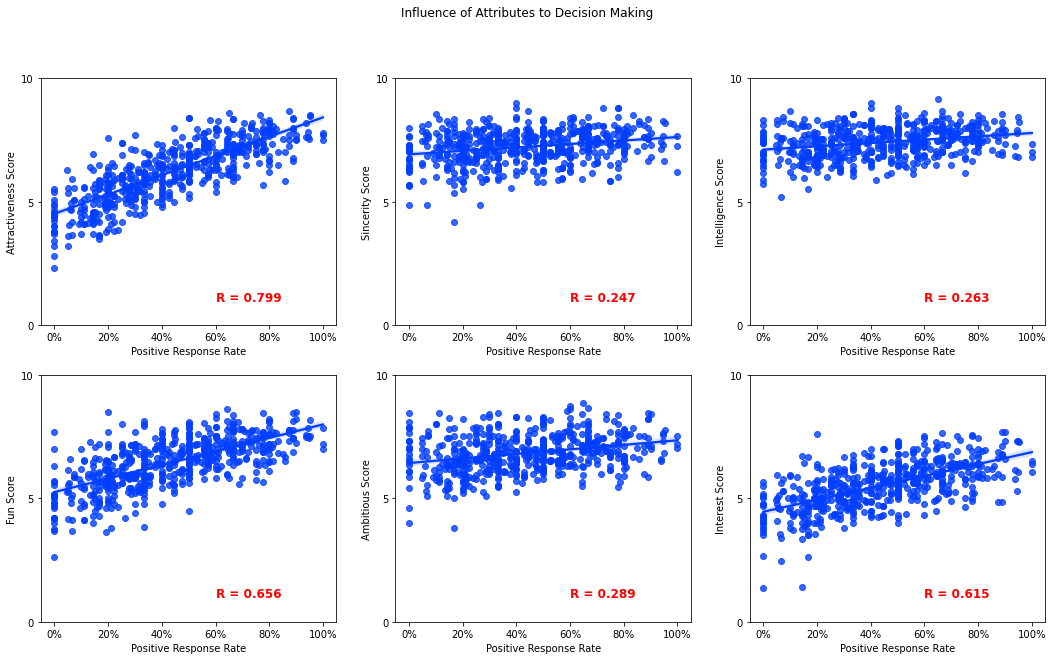

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Influence of Attributes to Decision Making')

# list for R_scores
l_R=[]
#################### attractive
sns.regplot(ax=axes[0, 0], data = graph_data_1, x='decision', y='attractive')
axes[0, 0].set_xlabel('Positive Response Rate')
axes[0, 0].set_ylabel('Attractiveness Score')
axes[0, 0].set_ylim(0,10)
axes[0, 0].set_yticks([0, 5, 10])
axes[0, 0].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
#compute  Pearson Product-Moment Correlation Coefficient (R score)
r1= round(np.corrcoef(graph_data_1['decision'], graph_data_1['attractive'])[0,1],3)
axes[0, 0].text(0.6, 1, f'R = {r1}', fontweight='bold', color='red',fontsize=12)
l_R.append(['attractive',r1])

#################### sincere
sns.regplot(ax=axes[0, 1], data = graph_data_2, x='decision', y='sincere')
axes[0, 1].set_xlabel('Positive Response Rate')
axes[0, 1].set_ylabel('Sincerity Score')
axes[0, 1].set_ylim(0,10)
axes[0, 1].set_yticks([0, 5, 10])
axes[0, 1].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r2= round(np.corrcoef(graph_data_2['decision'], graph_data_2['sincere'])[0,1],3)
axes[0, 1].text(0.6, 1, f'R = {r2}', fontweight='bold', color='red',fontsize=12)
l_R.append(['sincere',r2])

#################### intelligent
sns.regplot(ax=axes[0, 2], data = graph_data_3, x='decision', y='intelligent')
axes[0, 2].set_xlabel('Positive Response Rate')
axes[0, 2].set_ylabel('Intelligence Score')
axes[0, 2].set_ylim(0,10)
axes[0, 2].set_yticks([0, 5, 10])
axes[0, 2].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r3= round(np.corrcoef(graph_data_3['decision'], graph_data_3['intelligent'])[0,1],3)
axes[0, 2].text(0.6, 1, f'R = {r3}', fontweight='bold', color='red',fontsize=12)
l_R.append(['intelligent',r3])

######################## Fun
sns.regplot(ax=axes[1, 0], data = graph_data_4, x='decision', y='fun')
axes[1, 0].set_xlabel('Positive Response Rate')
axes[1, 0].set_ylabel('Fun Score')
axes[1, 0].set_ylim(0,10)
axes[1, 0].set_yticks([0, 5, 10])
axes[1, 0].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r4= round(np.corrcoef(graph_data_4['decision'], graph_data_4['fun'])[0,1],3)
axes[1, 0].text(0.6, 1, f'R = {r4}', fontweight='bold', color='red',fontsize=12)
l_R.append(['fun',r4])

######################## ambitious
sns.regplot(ax=axes[1, 1], data = graph_data_5, x='decision', y='ambitious')
axes[1, 1].set_xlabel('Positive Response Rate')
axes[1, 1].set_ylabel('Ambitious Score')
axes[1, 1].set_ylim(0,10)
axes[1, 1].set_yticks([0, 5, 10])
axes[1, 1].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r5= round(np.corrcoef(graph_data_5['decision'], graph_data_5['ambitious'])[0,1],3)
axes[1, 1].text(0.6, 1, f'R = {r5}', fontweight='bold', color='red',fontsize=12)
l_R.append(['ambitious',r5])

############### shared interests
sns.regplot(ax=axes[1, 2], data = graph_data_6, x='decision', y='shared_interests')
axes[1, 2].set_xlabel('Positive Response Rate')
axes[1, 2].set_ylabel('Interest Score')
axes[1, 2].set_ylim(0,10)
axes[1, 2].set_yticks([0, 5, 10])
axes[1, 2].xaxis.set_major_formatter(tick.PercentFormatter(1.0))
r6= round(np.corrcoef(graph_data_6['decision'], graph_data_6['shared_interests'])[0,1],3)
axes[1, 2].text(0.6, 1, f'R = {r6}', fontweight='bold', color='red',fontsize=12)
l_R.append(['shared_interests',r6])

Text(0, 0.5, '')

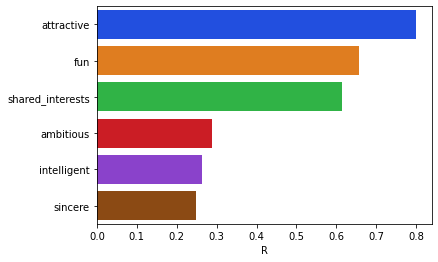

In [52]:
df_R = pd.DataFrame(l_R, columns=['attribute', 'R'])
ax = sns.barplot(y='attribute', x="R", data=df_R, order = df_R.sort_values('R', ascending = False).attribute)
ax.set_ylabel('')

🗒 **OBSERVATION**  
•	looking at the graph and correlation score, the most important attribute is attractiveness of the individual, followed by how fun the individual is and if the two people have any shared interest.  
•	In contrast, being sincere, being intelligent, and being ambitious would not necessarily get that person a higher positive response rate.   

In [53]:
# attractiveness per gender
mask = (data_event['attractive'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'attractive']]
r1m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['attractive'])[0,1],3)

mask = (data_event['attractive'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'attractive']]
r1f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['attractive'])[0,1],3)
r1f

# sincere per gender
mask = (data_event['sincere'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'sincere']]
r2m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['sincere'])[0,1],3)

mask = (data_event['sincere'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'sincere']]
r2f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['sincere'])[0,1],3)

# intelligent per gender
mask = (data_event['intelligent'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'intelligent']]
r3m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['intelligent'])[0,1],3)

mask = (data_event['intelligent'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'intelligent']]
r3f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['intelligent'])[0,1],3)

# fun per gender
mask = (data_event['fun'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r4m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['fun'])[0,1],3)

mask = (data_event['fun'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r4f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['fun'])[0,1],3)

# ambitious  per gender
mask = (data_event['ambitious'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'ambitious']]
r5m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['ambitious'])[0,1],3)

mask = (data_event['ambitious'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'ambitious']]
r5f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['ambitious'])[0,1],3)

# shared interests per gender
mask = (data_event['fun'].notnull()) & (data_event['partner_gender'] == 'Male')
corr_data_1m = data_event[mask][['partner_id', 'partner_gender', 'decision', 'fun']]
r6m= round(np.corrcoef(corr_data_1m['decision'], corr_data_1m['fun'])[0,1],3)

mask = (data_event['shared_interests'].notnull()) & (data_event['partner_gender'] == 'Female')
corr_data_1f = data_event[mask][['partner_id', 'partner_gender', 'decision', 'shared_interests']]
r6f= round(np.corrcoef(corr_data_1f['decision'], corr_data_1f['shared_interests'])[0,1],3)


In [54]:
l =[[r1,r2,r3,r4,r5,r6],[r1m,r2m,r3m,r4m,r5m,r6m],[r1f,r2f,r3f,r4f,r5f,r6f]]

In [55]:
d={'R_value': [r1,r2,r3,r4,r5,r6,r1m,r2m,r3m,r4m,r5m,r6m,r1f,r2f,r3f,r4f,r5f,r6f],
   'Type':['AVG','AVG','AVG','AVG','AVG','AVG', 'M','M','M','M','M','M', 'F', 'F', 'F', 'F', 'F', 'F'],
   'Attribute':['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests','attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shared_interests']    
}

corr_graph = pd.DataFrame(d)
corr_graph.head()

,R_value,Type,Attribute
0,0.799,AVG,attractive
1,0.247,AVG,sincere
2,0.263,AVG,intelligent
3,0.656,AVG,fun
4,0.289,AVG,ambitious


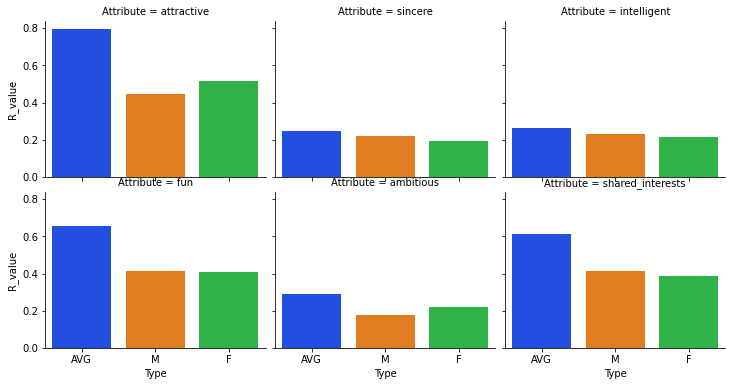

In [56]:
fg=sns.catplot(x="Type", y="R_value", kind="bar", data=corr_graph, col = 'Attribute',  col_wrap=3)
size = fg.fig.get_size_inches()
fg.fig.set_size_inches(10, 5)

🗒 **OBSERVATION**  
•	An attractive female would win more positive responses compared to an attractive male , that confirms that man do really care about attractiveness  
•	A sincere male would win slightly more positive responses compared to a sincere female. Women care more for sincerity  
•	An intelligent male would win more positive responses compared to an intelligent female.  
•	No significant difference between male and female on fun attribute.  
•	An ambitious female is highly desirable by males  
•	Females are more likely to give out a positive Reponses if the male has shared interest with her. In contrast, males are not so likely to give out a positive response even if the female has shared interest with him.

###### Conclusion  
>Intresting insights have been shown in this analysis. First, we have shown how different attributes influence getting the approval of others. After that, we have shown the behaviour difference between males and females for decision making.  

>Finally, many other questions can be raised:
>> could sharing same race or religion or even growing up in the same neighbourhood influence the chance to get another date  
could being in the same field or sharing the same interests increase the likelihood of getting an approval  
could being shy or sociable have an impact on getting along with others